In [1]:
# Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy 
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas 
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
# numba
import numba
print('numba: {}'.format(numba.__version__))
# pyod
from pyod import version
print('pyod: {}'.format(version.__version__))

Python: 3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]
scipy: 1.2.1
numpy: 1.16.2
matplotlib: 3.0.3
pandas: 0.24.2
sklearn: 0.20.3
numba: 0.43.0
pyod: 0.6.8


In [2]:
# Load libraries
import numpy as np
from numpy.linalg import inv, det
import pandas as pd 

from pandas.plotting import scatter_matrix
#import matplotlib.pyplot as plt
#%matplotlib inline
import matplotlib.pyplot as plt


from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import random
from tensorflow.python.keras.layers.core import Dense, Activation, Dropout
from tensorflow.python.keras.layers.recurrent import LSTM
from tensorflow.python.keras.models import Sequential
from tensorflow.python.framework import ops
ops.reset_default_graph()
from tensorflow.python.keras import backend as K
import time
import gc
#  USING ABOVE

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn import metrics

import seaborn as sns
from sklearn.model_selection import train_test_split

import scipy.stats as stats


from pyod.models.knn import KNN   # kNN detector
from pyod.utils.utility import standardizer


from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA
from pyod.models.lscp import LSCP
from pyod.utils.utility import standardizer
from pyod.utils.utility import precision_n_scores

import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
#0 = all messages are logged (default behavior)
#1 = INFO messages are not printed
#2 = INFO and WARNING messages are not printed
#3 = INFO, WARNING, and ERROR messages are not printed

In [3]:
# Load dataset
dfs = pd.read_csv(r'FinalProcessing_out.csv', header = 0)

print("Number of observations:",len(dfs))
print("Number of normal transactions:",sum(dfs.cia==0))
print("Number of outliers:",sum(dfs.cia==1))
print("Ratio of outliers versus normal transaction:",sum(dfs.cia==1)/sum(dfs.cia==0))

Number of observations: 4335
Number of normal transactions: 3361
Number of outliers: 974
Ratio of outliers versus normal transaction: 0.2897947039571556


In [4]:
print("Dataset Shape:",dfs.shape)

Dataset Shape: (4335, 36)


In [5]:
#print( dfs)
x = dfs.drop(columns = ["cia"])
y = dfs.cia


In [6]:
outliers_fraction = np.count_nonzero(y) / len(y)
outliers_percentage = round(outliers_fraction * 100, ndigits=4)

#print(outliers_fraction)
print("outliers_percentage: ",outliers_percentage,"%")


# Define nine outlier detection tools to be compared
#RandomState - train_test_split splits arrays or matrices into random train and test subsets. 
# That means that everytime you run it without specifying random_state, you will get a different result, this is expected behavior.
# On the other hand if you use random_state=some_number, then you can guarantee that the output of Run 1 will be equal to the output of Run 2,
random_state = np.random.RandomState(42)
print(x.shape)
print(y.shape)

# 60% data for training and 40% for testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)

 # standardizing data for processing
X_train_norm, X_test_norm = standardizer(X_train, X_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

outliers_percentage:  22.4683 %
(4335, 35)
(4335,)
(3468, 35)
(867, 35)
(3468,)
(867,)


In [7]:
# Declaring SVM Model
from sklearn.svm import SVC  
# = SVC(kernel='poly', degree=3, gamma='scale')  
#svclassifier = SVC() 

Options = [3, 5, 7, 12, 20, 23, 25, 28, 35, 38, 41, 44, 55, 65 ]
degree = []
Precision = []
Recall = []
F1score = []

for k in range (0, 13):
    svclassifier = SVC(kernel='rbf', gamma='scale') 

    svclassifier.fit(X_train, y_train)

    pred = svclassifier.predict(X_test) 

    # evaluate accuracy
    print ("===========================================")
    print ("SVM Model Degree:", Options[k])
    print ("===========================================")
    #print("Micro")
    #print("Precision Score",round(metrics.precision_score(y_test, pred.round(),average='micro'), ndigits=5))
    #print("Recall Score",round(metrics.recall_score(y_test, pred.round(),average='micro'), ndigits=5))
    #print("F1 Score",round(metrics.f1_score(y_test, pred.round(),average='micro'), ndigits=5))
    #print ("===========================================")
    print("Macro")
    print("Precision Score",round(metrics.precision_score(y_test, pred.round(),average='macro'), ndigits=5))
    print("Recall Score",round(metrics.recall_score(y_test, pred.round(),average='macro'), ndigits=5))
    print("F1 Score",round(metrics.f1_score(y_test, pred.round(),average='macro'), ndigits=5))
    print ("===========================================")
    #print("Weighted")
    #print("Precision Score",round(metrics.precision_score(y_test, pred.round(),average='weighted'), ndigits=5))
    #print("Recall Score",round(metrics.recall_score(y_test, pred.round(),average='weighted'), ndigits=5))
    #print("F1 Score",round(metrics.f1_score(y_test, pred.round(),average='weighted'), ndigits=5))
    
    K.clear_session()
    degree.append(Options[k])
    
    Precision.append(round(metrics.precision_score(y_test, pred.round(),average='macro'), ndigits=5))
    Recall .append(round(metrics.recall_score(y_test, pred.round(),average='macro'), ndigits=5))
    F1score.append(round(metrics.f1_score(y_test, pred.round(),average='macro'), ndigits=5))
    


SVM Model Degree: 3
Macro
Precision Score 0.90871
Recall Score 0.60471
F1 Score 0.62293
SVM Model Degree: 5
Macro
Precision Score 0.90871
Recall Score 0.60471
F1 Score 0.62293
SVM Model Degree: 7
Macro
Precision Score 0.90871
Recall Score 0.60471
F1 Score 0.62293
SVM Model Degree: 12
Macro
Precision Score 0.90871
Recall Score 0.60471
F1 Score 0.62293
SVM Model Degree: 20
Macro
Precision Score 0.90871
Recall Score 0.60471
F1 Score 0.62293
SVM Model Degree: 23
Macro
Precision Score 0.90871
Recall Score 0.60471
F1 Score 0.62293
SVM Model Degree: 25
Macro
Precision Score 0.90871
Recall Score 0.60471
F1 Score 0.62293
SVM Model Degree: 28
Macro
Precision Score 0.90871
Recall Score 0.60471
F1 Score 0.62293
SVM Model Degree: 35
Macro
Precision Score 0.90871
Recall Score 0.60471
F1 Score 0.62293
SVM Model Degree: 38
Macro
Precision Score 0.90871
Recall Score 0.60471
F1 Score 0.62293
SVM Model Degree: 41
Macro
Precision Score 0.90871
Recall Score 0.60471
F1 Score 0.62293
SVM Model Degree: 44
Mac

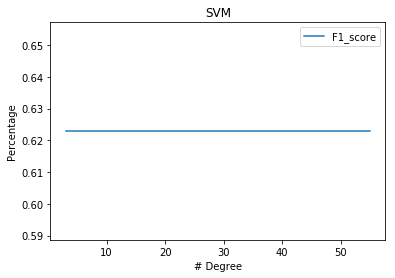

In [8]:
plt.plot(degree,F1score)
#plt.plot(degree,Recall)
#plt.plot(degree,Precision)
#plt.plot(F1score)
plt.title('SVM')
plt.ylabel('Percentage')
plt.xlabel('# Degree')
plt.legend(['F1_score', 'Recall','Precision'], loc='upper right')
plt.show()

In [19]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    cm[0,0] =483
    cm[0,1] =159
    cm[1,0] =6
    cm[1,1] =1520
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           xlabel='Actual Values',
           ylabel='Predicted Values')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax




[0 1]
Confusion matrix, without normalization
[[ 483  159]
 [   6 1520]]
Normalized confusion matrix
[[ 483.  159.]
 [   6. 1520.]]


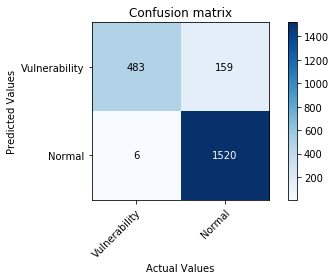

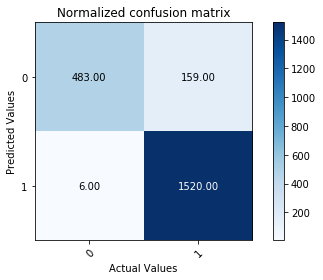

In [20]:
print(unique_labels(y_test, pred))
np.set_printoptions(precision=2)
class_names = [ "Vulnerability","Normal"]#y_test.target_names
# Plot non-normalized confusion matrix
plot_confusion_matrix( pred, y_test,classes=class_names, title='Confusion matrix')

# Plot normalized confusion matrix
plot_confusion_matrix( pred, y_test,classes=unique_labels(y_test, pred), normalize=True, title='Normalized confusion matrix')

plt.show()